<a href="https://colab.research.google.com/github/mtareqsoliman/msthesis/blob/main/100ML_10282022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+# Final Report



Importing Data:

In [16]:
import pandas as pd
import numpy as np
import math as math
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.gridspec import GridSpec
import scipy.stats as sp
from scipy.optimize import minimize, LinearConstraint
import scipy.optimize as spo
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rc
from matplotlib import rcParams
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


ecu_list = -np.random.lognormal(np.log(0.006),np.sqrt(np.log(1+0.35**2)),100)

mean = ln(0.006)
std dev = sqrt(ln(1+0.35**2))

mean = ln(

In [181]:

NLTHA100 = pd.read_excel('https://github.com/mtareqsoliman/msthesis/blob/main/Results/100NLTHA_FINAL.xlsx?raw=true')
ecu_100,Vult_100 = np.array(NLTHA100[['ecu']]),np.array(NLTHA100[['Vult']])

ecu_100_alpha = norm.cdf(np.log(-ecu_100), np.log(-ecu_100).mean(), np.log(-ecu_100).std())
Vult_100_alpha = norm.cdf(np.log(Vult_100), np.log(Vult_100).mean(), np.log(Vult_100).std())
ecu_100_alpha = norm.ppf(ecu_100_alpha,0,1)

Vult_100_alpha = norm.ppf(Vult_100_alpha,0,1)

NLTHA100.insert(2,'ecu_alpha',ecu_100_alpha)
NLTHA100.insert(3,'Vult_alpha',Vult_100_alpha)
NLTHA100

,state,IM,ecu_alpha,Vult_alpha,record,ecu,Vult,Vbmax,ect,ecb,uindex,convergence
0,0,5,-2.813518,1.606817,RSN126_GAZLI_GAZ000,-0.002400,229.521449,61.769036,-0.000417,-0.000707,0,0
1,0,5,-2.813518,1.606817,RSN461_MORGAN_HVR240,-0.002400,229.521449,59.940031,-0.000410,-0.000683,0,0
2,0,5,-2.813518,1.606817,RSN518_PALMSPR_FVR045,-0.002400,229.521449,117.263469,-0.000838,-0.001389,0,0
3,0,5,-2.813518,1.606817,RSN599_WHITTIER.A_A-FLO020,-0.002400,229.521449,133.191829,-0.001051,-0.002344,0,0
4,0,5,-2.813518,1.606817,RSN721_SUPER.B_B-ICC090,-0.002400,229.521449,79.856953,-0.000524,-0.000925,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9595,1,40,0.048773,-2.328627,RSN1605_DUZCE_DZC270,-0.006187,113.030293,150.644869,-0.005808,-0.101586,692,0
9596,1,40,-1.592317,1.027135,RSN1605_DUZCE_DZC270,-0.003595,206.780844,116.144114,-0.001369,-0.086233,694,FAILED
9597,0,40,1.819887,-0.170164,RSN1148_KOCAELI_ARE000,-0.011115,166.693662,163.439663,-0.002903,-0.008846,0,0
9598,1,40,0.487664,0.438625,RSN1605_DUZCE_DZC270,-0.007153,185.997557,155.132256,-0.003463,-0.095869,936,0


In [4]:
NLTHA100_pivot = pd.pivot_table(NLTHA100, values='state', index=['ecu_alpha','Vult_alpha'],columns=['IM'], aggfunc=np.sum)  #merging rows makes more problems so leave them as they are
NLTHA100_pivot.insert(0,0,0)
NLTHA100_pivot= NLTHA100_pivot/12
NLTHA100_pivot


,IM,0,5,10,15,20,25,30,35,40
ecu_alpha,Vult_alpha,,,,,,,,,
-2.813518,1.606817,0.0,0.000000,0.333333,0.666667,0.916667,1.000000,1.000000,1.000000,1.000000
-2.355960,-0.040334,0.0,0.000000,0.333333,0.666667,0.833333,1.000000,1.000000,1.000000,1.000000
-1.965330,-1.051338,0.0,0.166667,0.916667,1.000000,0.916667,1.000000,1.000000,1.000000,1.000000
-1.634811,0.801003,0.0,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000,1.000000
-1.592317,1.027135,0.0,0.083333,0.583333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
1.532694,-0.664430,0.0,0.000000,0.000000,0.333333,0.583333,0.750000,0.833333,1.000000,1.000000
1.614772,-0.343347,0.0,0.000000,0.000000,0.083333,0.333333,0.666667,0.750000,0.833333,0.916667
1.751943,1.083291,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.583333,0.750000,0.833333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14:

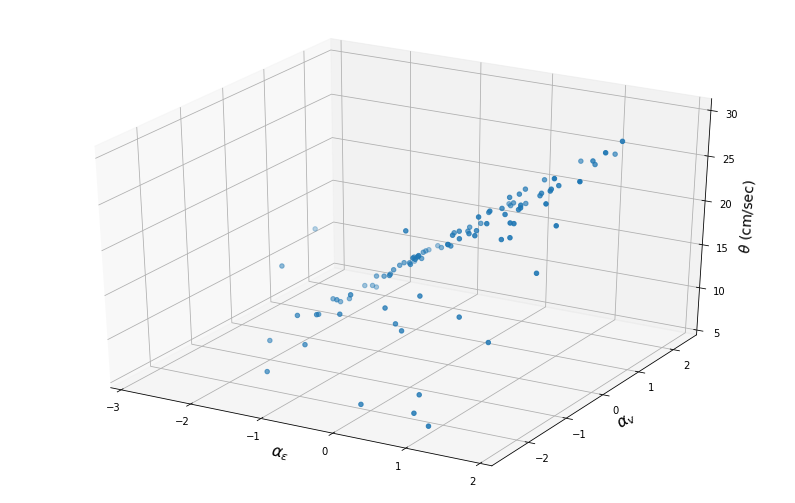

In [182]:

##pivot_numpy = np.concatenate((np.zeros(9)[:, np.newaxis], pivot_numpy), axis=1)
ecu_100_alpha_frag, Vult_100_alpha_frag = zip(*NLTHA100_pivot.index.values)
ecu_100_alpha_frag, Vult_100_alpha_frag = np.asarray(ecu_100_alpha_frag), np.asarray(Vult_100_alpha_frag)

result_100_list = []
theta_100_list = []
beta_100_list = []

IM = np.arange(0,45,5)
fragility_table = pd.DataFrame(columns = ['0','5','10','15','20','25','30','35','40'])
z_list = []

def frag(thetabeta):
    estimated_fragility = sp.norm.cdf(np.log(factor_list),np.log(thetabeta[0]),thetabeta[1])
    log_likelihood = np.log(sp.binom.pmf(pcllps*nrcrds,nrcrds,estimated_fragility))
    fun = -np.sum(log_likelihood)

    return fun

for i,ecu_i in enumerate(ecu_100_alpha_frag):
    factor_list = np.array([0,5,10,15,20,25,30,35,40])
    pcllps = NLTHA100_pivot.iloc[i]
    nrcrds = 12
    ncllps = pcllps*nrcrds

    # starting guess
    theta, beta = 24,0.4
    
    # Bounds
    bnds = ((4, 50), (0.2, 1))

    thetabeta_start = [theta,beta]
    
    result = spo.minimize(frag,thetabeta_start,options={'disp': True},bounds=bnds)

    if result.success:
        miny = result.x
        theta_mxlk = round(miny[0],2)
        beta_mxlk = round(miny[1],2)
        theta_100_list.append(theta_mxlk)
        beta_100_list.append(beta_mxlk)

        z_mxlk = -round(result.fun,2)
        z_list.append(z_mxlk)
        fragility_table.loc[i] = sp.norm.cdf(np.log(IM),np.log(theta_mxlk),beta_mxlk)

theta_100_list = np.array(theta_100_list)
beta_100_list = np.array(beta_100_list)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating plot
ax.scatter(ecu_100_alpha_frag, Vult_100_alpha_frag, theta_100_list)
ax.set_zlabel(r"$\theta$ (cm/sec)",fontsize=14)
ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
ax.set_ylabel(r"$\alpha_v$",fontsize=16)
fig.show()


This is the 3D plot of fragility outputs for 9 CCM combination of ecu and Vult metavariables

[ 0.          0.34511509  0.04981695 -0.04764601  0.0671674  -0.09591789
 -0.03026323  0.02730979 -0.0240111   0.02779651]


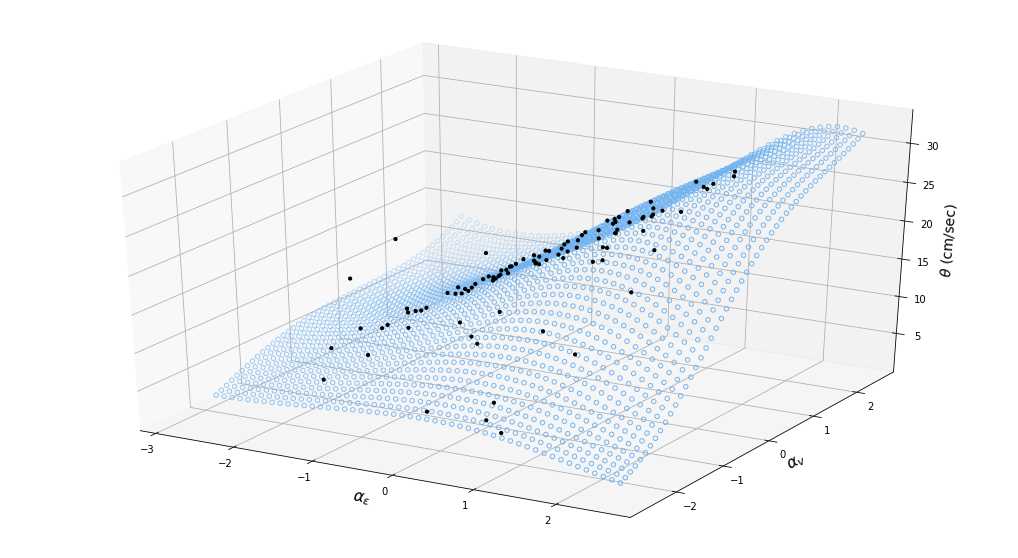

In [52]:
# -*- coding: utf-8 -*-

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_1,x_2 = map(list,zip(*NLTHA100_pivot.index.values))
x_values =np.column_stack((x_1,x_2))
y_values = np.log(theta_100_list)
poly_model = PolynomialFeatures(degree=3)
poly_x_values = poly_model.fit_transform(x_values)

# should be in the form [1, a, b, a^2, ab, b^2]
poly_model.fit(poly_x_values, y_values)
regression_model = LinearRegression()
regression_model.fit(poly_x_values, y_values)

y_pred = regression_model.predict(poly_x_values)
print(regression_model.coef_)
#p00,p10,p01,p20,p11,p02 = regression_model.coef_.T
MSE = mean_squared_error(y_values, y_pred, squared=False)


x1_mesh,x2_mesh = np.linspace(-2.5, 2.5, 50), np.linspace(-2.5, 2.5, 50)
x1_mesh, x2_mesh = np.meshgrid(x1_mesh, x2_mesh)
x_mesh = np.array([x1_mesh.flatten(), x2_mesh.flatten()]).T
poly_x_mesh = poly_model.fit_transform(x_mesh)
y_mesh = regression_model.predict(poly_x_mesh)

fig, ax = plt.subplots(figsize =(18,10), subplot_kw={'projection': '3d'})


ax.set_zlabel(r"$\theta$ (cm/sec)",fontsize=14)
ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
ax.set_ylabel(r"$\alpha_v$",fontsize=16)

ax.scatter(x_values[:,0], x_values[:,1], np.exp(y_values),color='black',marker='.',alpha=1,s=40)
ax.scatter(x1_mesh, x2_mesh, np.exp(y_mesh), facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')


In [54]:
x1_mesh,x2_mesh = np.linspace(-2.5, 2, 50), np.linspace(-2.5, 2, 50)
x1_mesh, x2_mesh = np.meshgrid(x1_mesh, x2_mesh)
x_mesh = np.array([x1_mesh.flatten(), x2_mesh.flatten()]).T

def mesh_maker(degree):
    poly_model = PolynomialFeatures(degree)
    poly_x_values = poly_model.fit_transform(x_values)
    # should be in the form [1, a, b, a^2, ab, b^2]
    poly_model.fit(poly_x_values, y_values)
    regression_model = LinearRegression()
    regression_model.fit(poly_x_values, y_values)

    y_pred = regression_model.predict(poly_x_values)
    #p00,p10,p01,p20,p11,p02 = regression_model.coef_.T
    MSE = mean_squared_error(y_values, y_pred, squared=False)
    poly_x_mesh = poly_model.fit_transform(x_mesh)
    y_mesh = regression_model.predict(poly_x_mesh)
    return y_mesh

fig = go.Figure()

fig.add_trace(
              go.Scatter3d(x=ecu_100_alpha_frag, y=Vult_100_alpha_frag, z=theta_100_list,mode='markers',marker_size=1.5,marker_color='gray',opacity=0.7))

for dgr, clrscl in zip([3,4,5],["Sunsetdark","Viridis","emrld"]):
    fig.add_trace(                       
                  go.Scatter3d(x=x_mesh[:,0], y=x_mesh[:,1], z=np.exp(mesh_maker(dgr)),mode='markers',marker_size=1,marker_color='silver',opacity=0.5,visible=False))

    fig.add_trace(
                  go.Mesh3d(x=x_mesh[:,0], y=x_mesh[:,1], z=np.exp(mesh_maker(dgr))
                            ,opacity=0.4, contour_show=True,
                            intensity=np.exp(mesh_maker(3)),
                            colorscale=clrscl,visible=False))


fig.update_layout(scene = dict(
                              xaxis_title=r"$\alpha_\epsilon$",
                              yaxis_title='alpha_Vult',
                              zaxis_title=r"$\theta$ (cm/sec)"),
                              width=800,
                              height=600,
                              legend=dict(itemclick=False),
                showlegend=False,
                autosize=False,
                margin=dict(t=40, b=0, l=0, r=0)
                )

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Just points",
                     method="update",
                     args=[{"visible": [True,False, False, False, False, False, False]},
                           {"title": "No model",
                            "annotations": []}]),
                dict(label="3th degree",
                     method="update",
                     args=[{"visible": [True,True, True, False, False, False, False]},
                           {"title": "3th degree model",
                            "annotations": []}]),
                dict(label="4th degree",
                     method="update",
                    args=[{"visible": [True,False, False, True, True, False, False]},
                           {"title": "4th degree model",
                            "annotations": []}]),
                dict(label="5th degree",
                     method="update",
                     args=[{"visible": [True,False, False, False, False, True, True]},
                           {"title": "5th degree model",
                            "annotations":  []}]),
            ]),
        )
    ])

fig.show()

# Add dropdown



In [ ]:
######## testing phase ################

## preparing data

fig,ax = plt.subplots(1,2,figsize=(20,8))
for i,clr,dgr in zip(['3rd degree','4th degree','5th degree'],['red','blue','green'],[3,4,5]):
    poly_model = PolynomialFeatures(degree=dgr)

    poly_x_values = poly_model.fit_transform(x_values)
    # should be in the form [1, a, b, a^2, ab, b^2]
    poly_model.fit(poly_x_values, y_values)
    regression_model = LinearRegression()
    regression_model.fit(poly_x_values, y_values)
    y_pred = regression_model.predict(poly_x_values)
    #p00,p10,p01,p20,p11,p02 = regression_model.coef_.T
    MSE = mean_squared_error(y_values, y_pred, squared=True)
    print(MSE)
 
    
    test_x = np.column_stack(map(list,zip(*NLTHA100_pivot.index.values)))
    test_y = np.log(theta_100_list)
    test_poly_x =  poly_model.fit_transform(test_x)
    test_y_pred = regression_model.predict(test_poly_x)
    r2 = r2_score(np.exp(test_y), np.exp(test_y_pred))
    test_y_residual = (test_y_pred-test_y)/test_y

    print(r2)
    ax[0].scatter(test_x[:,0],test_y_residual,color=clr,s=10,label=i,alpha=0.5)
    ax[0].spines['bottom'].set_position('zero')
    ax[0].spines['right'].set_color('none')
    ax[0].spines['top'].set_color('none')
    ax[0].set_title(r"Relative error for $\alpha_\epsilon$")
    ax[0].set_ylabel(r"residual error $\frac{ln(y_{pred})-ln(y_{act})}{ln(y_{act})}$")
    ax[0].legend()

    ax[1].scatter(test_x[:,1],test_y_residual,color=clr,s=10,label=i,alpha=0.5)
    ax[1].spines['bottom'].set_position('zero')
    ax[1].spines['right'].set_color('none')
    ax[1].spines['top'].set_color('none')
    ax[1].set_title(r"Relative error for $\alpha_V$")
    ax[1].set_ylabel(r"residual error $\frac{ln(y_{pred})-ln(y_{act})}{ln(y_{act})}$")
    ax[1].legend()


    print('\n')
'''
## graphing residual plot

test_y_residual = (test_y_pred-test_y)


fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')


ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
ax.set_ylabel(r"$\alpha_v$",fontsize=16)
ax.set_zlabel(r"$\theta$ residual (cm/sec)",fontsize=14)
ax.set_zlim(-1,1)

ax.scatter(x_values[:,0], x_values[:,1], (y_pred-y_values)/y_values,color='black',marker='.',alpha=1,s=70)
ax.scatter(test_x[:,0], test_x[:,1], test_y_residual/test_y,color='black',marker='.',alpha=0.25,s=70)
'''

Text(0.5, 1.0, 'Accuracy vs. number of degrees of freedom')

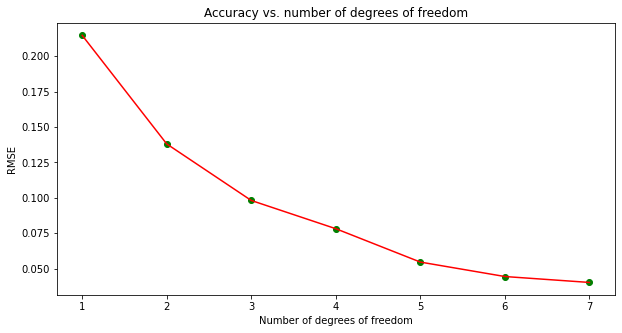

In [179]:

# -*- coding: utf-8 -*-


number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   test_poly_x =  poly_model.fit_transform(test_x)
   test_y_pred = regression_model.predict(test_poly_x)
   
   plt_mean_squared_error.append(mean_squared_error(test_y, test_y_pred, squared=False))
  
fig,ax = plt.subplots(figsize=(10,5))  
ax.scatter(number_degrees,plt_mean_squared_error, color="green")
ax.plot(number_degrees,plt_mean_squared_error, color="red")
ax.xaxis.get_major_locator().set_params(integer=True)
ax.set_xlabel('Number of degrees of freedom')
ax.set_ylabel('RMSE')
ax.set_title('Accuracy vs. number of degrees of freedom')


Model is set from [-1,1] range only

In [176]:
'''
## cleaning data 

# Detection
# IQR
Q1 = np.percentile(result_100_list[['theta_100']], 16,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(result_100_list[['theta_100']], 84,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
  
# Upper bound
upper = np.where(result_100_list[['theta_100']] >= (Q3+1.5*IQR))[0]
# Lower bound
lower = np.where(result_100_list[['theta_100']] <= (Q1-1.5*IQR))[0]
 
# Removing the Outliers 
result_100_cleaned = pd.DataFrame(result_100_list)

result_100_cleaned[['theta_100']].drop(upper[0], inplace = True)
result_100_cleaned[['theta_100']].drop(lower[0], inplace = True)
'''
x1_mesh,x2_mesh = np.linspace(-2, 2, 50), np.linspace(-2, 2, 50)
x1_mesh, x2_mesh = np.meshgrid(x1_mesh, x2_mesh)
x_mesh = np.array([x1_mesh.flatten(), x2_mesh.flatten()]).T

cropped_model= pd.DataFrame(columns=['ecu_alpha','Vult_alpha','theta'])
cropped_model['ecu_alpha'],cropped_model['Vult_alpha'],cropped_model['theta']  = x_1,x_2,test_y

cropped_model = cropped_model[(cropped_model['ecu_alpha'] > -2)&(cropped_model['ecu_alpha'] <1)&(cropped_model['Vult_alpha'] > -2)&(cropped_model['Vult_alpha'] <1)]
cropped_x_values = np.column_stack((cropped_model['ecu_alpha'],cropped_model['Vult_alpha']))


def mesh_maker(degree):
    poly_model = PolynomialFeatures(degree)
    poly_cropped_x_values = poly_model.fit_transform(cropped_x_values)
    # should be in the form [1, a, b, a^2, ab, b^2]
    poly_model.fit(poly_cropped_x_values, cropped_model['theta'])
    regression_model = LinearRegression()
    regression_model.fit(poly_cropped_x_values, cropped_model['theta'])
    poly_x_values = poly_model.fit_transform(x_values)
    y_pred = regression_model.predict(poly_x_values)
    #p00,p10,p01,p20,p11,p02 = regression_model.coef_.T
    MSE = mean_squared_error(test_y, y_pred, squared=False)
    poly_x_mesh = poly_model.fit_transform(x_mesh)
    y_mesh = regression_model.predict(poly_x_mesh)
    return y_mesh

fig = go.Figure()

fig.add_trace(
              go.Scatter3d(x=ecu_100_alpha_frag, y=Vult_100_alpha_frag, z=theta_100_list,mode='markers',marker_size=1.5,marker_color='gray',opacity=0.7))

for dgr, clrscl in zip([2,3,5],["Sunsetdark","Viridis","emrld"]):
    fig.add_trace(                       
                  go.Scatter3d(x=x_mesh[:,0], y=x_mesh[:,1], z=np.exp(mesh_maker(dgr)),mode='markers',marker_size=1,marker_color='silver',opacity=0.5,visible=False))

    fig.add_trace(
                  go.Mesh3d(x=x_mesh[:,0], y=x_mesh[:,1], z=np.exp(mesh_maker(dgr))
                            ,opacity=0.4, contour_show=True,
                            intensity=np.exp(mesh_maker(3)),
                            colorscale=clrscl,visible=False))


fig.update_layout(scene = dict(
                              xaxis_title=r"$\alpha_\epsilon$",
                              yaxis_title='alpha_Vult',
                              zaxis_title=r"$\theta$ (cm/sec)"),
                              width=800,
                              height=600,
                              legend=dict(itemclick=False),
                showlegend=False,
                autosize=False,
                margin=dict(t=40, b=0, l=0, r=0)
                )

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Just points",
                     method="update",
                     args=[{"visible": [True,False, False, False, False, False, False]},
                           {"title": "No model",
                            "annotations": []}]),
                dict(label="2th degree",
                     method="update",
                     args=[{"visible": [True,True, True, False, False, False, False]},
                           {"title": "3th degree model for limited range",
                            "annotations": []}]),
                dict(label="3th degree",
                     method="update",
                    args=[{"visible": [True,False, False, True, True, False, False]},
                           {"title": "4th degree model for limited range",
                            "annotations": []}]),
                dict(label="5th degree",
                     method="update",
                     args=[{"visible": [True,False, False, False, False, True, True]},
                           {"title": "5th degree model for limited range",
                            "annotations":  []}]),
            ]),
        )
    ])

fig.show()

# Add dropdown


0.4184808132678914
-0.2032795874437341


0.9248975858111267
-4.877636705555669




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



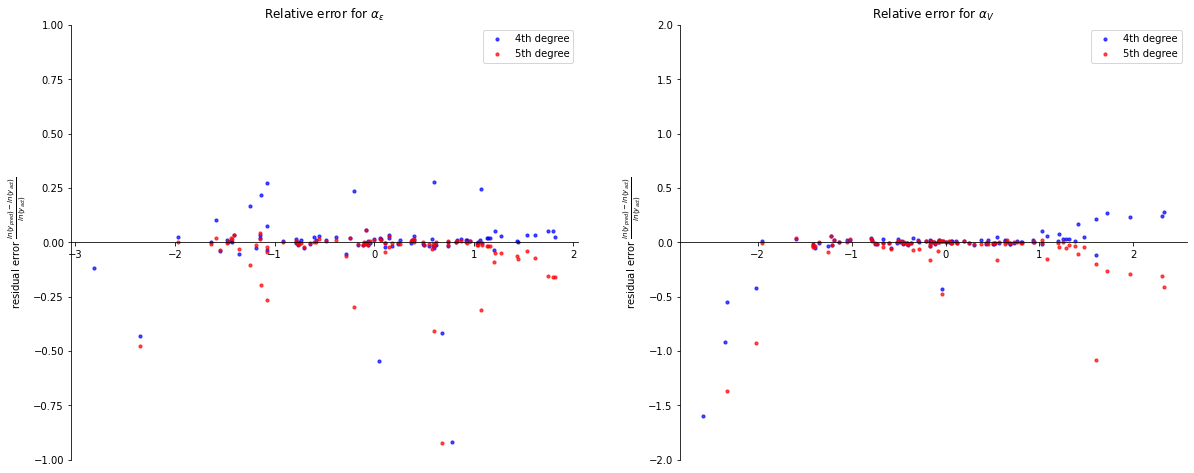

In [165]:
cropped_model= pd.DataFrame(columns=['ecu_alpha','Vult_alpha','theta'])
cropped_model['ecu_alpha'],cropped_model['Vult_alpha'],cropped_model['theta']  = x_1,x_2,test_y

cropped_model = cropped_model[(cropped_model['ecu_alpha'] > -2)&(cropped_model['ecu_alpha'] <1)&(cropped_model['Vult_alpha'] > -2)&(cropped_model['Vult_alpha'] <1)]
cropped_x_values = np.column_stack((cropped_model['ecu_alpha'],cropped_model['Vult_alpha']))

fig,ax = plt.subplots(1,2,figsize=(20,8))
for i,clr,dgr in zip(['4th degree','5th degree'],['blue','red'],[3,4]):

    poly_model = PolynomialFeatures(degree=dgr)

    poly_cropped_x_values = poly_model.fit_transform(cropped_x_values)
    # should be in the form [1, a, b, a^2, ab, b^2]
    poly_model.fit(poly_cropped_x_values, cropped_model['theta'])
    regression_model = LinearRegression()
    regression_model.fit(poly_cropped_x_values, cropped_model['theta'])
    poly_x_values = poly_model.fit_transform(x_values)
    y_pred = regression_model.predict(poly_x_values)
    #p00,p10,p01,p20,p11,p02 = regression_model.coef_.T

 
    
    test_x = np.column_stack(map(list,zip(*NLTHA100_pivot.index.values)))
    test_y = np.log(theta_100_list)
    test_poly_x =  poly_model.fit_transform(test_x)
    test_y_pred = regression_model.predict(test_poly_x)
    r2 = r2_score(test_y, test_y_pred)
    test_y_residual = (test_y_pred-test_y)/test_y
    RMSE = mean_squared_error(test_y, test_y_pred, squared=False)
    print(RMSE)

    print(r2)
    ax[0].scatter(test_x[:,0],test_y_residual,color=clr,s=10,label=i,alpha=0.7)
    ax[0].spines['bottom'].set_position('zero')
    ax[0].spines['right'].set_color('none')
    ax[0].spines['top'].set_color('none')
    ax[0].set_title(r"Relative error for $\alpha_\epsilon$")
    ax[0].set_ylabel(r"residual error $\frac{ln(y_{pred})-ln(y_{act})}{ln(y_{act})}$")
    ax[0].set_ylim([-1,1])
    ax[0].legend()

    ax[1].scatter(test_x[:,1],test_y_residual,color=clr,s=10,label=i,alpha=0.7)
    ax[1].spines['bottom'].set_position('zero')
    ax[1].spines['right'].set_color('none')
    ax[1].spines['top'].set_color('none')
    ax[1].set_title(r"Relative error for $\alpha_V$")
    ax[1].set_ylabel(r"residual error $\frac{ln(y_{pred})-ln(y_{act})}{ln(y_{act})}$")
    ax[1].set_ylim([-2,2])

    ax[1].legend()


    print('\n')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. S

Text(0.5, 1.0, 'Accuracy vs. number of degrees of freedom')

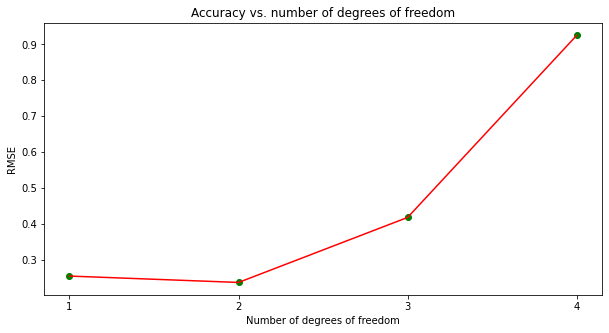

In [177]:
number_degrees = [1,2,3,4]
plt_mean_squared_error = []
for degree in number_degrees:

    poly_model = PolynomialFeatures(degree=degree)
    poly_cropped_x_values = poly_model.fit_transform(cropped_x_values)
    poly_model.fit(poly_cropped_x_values, cropped_model['theta'])
    regression_model = LinearRegression()
    regression_model.fit(poly_cropped_x_values, cropped_model['theta'])
    poly_x_values = poly_model.fit_transform(x_values)
    y_pred = regression_model.predict(poly_x_values)
    #p00,p10,p01,p20,p11,p02 = regression_model.coef_.T

 
    
    test_x = np.column_stack(map(list,zip(*NLTHA100_pivot.index.values)))
    test_y = np.log(theta_100_list)
    test_poly_x =  poly_model.fit_transform(test_x)
    test_y_pred = regression_model.predict(test_poly_x)
    r2 = r2_score(test_y, test_y_pred)
    test_y_residual = (test_y_pred-test_y)/test_y
    RMSE = mean_squared_error(test_y, test_y_pred, squared=False)   
    plt_mean_squared_error.append(mean_squared_error(test_y, test_y_pred, squared=False))
  
fig,ax = plt.subplots(figsize=(10,5))  
ax.scatter(number_degrees,plt_mean_squared_error, color="green")
ax.plot(number_degrees,plt_mean_squared_error, color="red")
ax.xaxis.get_major_locator().set_params(integer=True)
ax.set_xlabel('Number of degrees of freedom')
ax.set_ylabel('RMSE')
ax.set_title('Accuracy vs. number of degrees of freedom')